# <font color='056938'> Caso de Estudio Aprendizaje No Supervisado </font>
---

### Valoraciones sobre viajes

Este conjunto de datos se obtiene a partir de las valoraciones de los usuarios en Google. Se tienen en cuenta las opiniones sobre atracciones de 24 categorías de toda Europa. Las valoraciones de los usuarios de Google van de 1 a 5 y se calcula la valoración media por categoría.

## <font color='157699'> Importanción de Librerías </font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.datasets import make_blobs

from scipy import stats
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage

%pip install factor_analyzer
from factor_analyzer import FactorAnalyzer

%pip install kneed
from kneed import KneeLocator


Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("default")
warnings.simplefilter(action="ignore", category=FutureWarning)

## <font color='157699'> Lectura del Dataset </font>

In [3]:
# Lectura del dataset
df = pd.read_csv('https://raw.githubusercontent.com/Leostark95/Analitica_2_Proyecto_2/master/BD.csv', sep = ";")
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [4]:
nuevos_nombres = {
    'Category 1': 'churches', 'Category 2': 'resorts', 'Category 3': 'beaches', 'Category 4': 'parks', 'Category 5': 'theatres', 'Category 6': 'museums', 'Category 7': 'malls',
    'Category 8': 'zoo', 'Category 9': 'restaurants', 'Category 10': 'pubs/bars', 'Category 11': 'local services', 'Category 12': 'burger/pizza shops', 'Category 13': 'hotels/other lodgings',
    'Category 14': 'juice bars', 'Category 15': 'art galleries', 'Category 16': 'dance clubs', 'Category 17': 'swimming pools', 'Category 18': 'gyms', 'Category 19': 'bakeries',
    'Category 20': 'beauty & spas', 'Category 21': 'cafes', 'Category 22': 'view points', 'Category 23': 'monuments', 'Category 24': 'gardens'
}

df.rename(columns=nuevos_nombres, inplace=True)


In [5]:
df.head()

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


## <font color='157699'> EDA </font>

In [6]:
#Información general de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User                   5456 non-null   object 
 1   churches               5456 non-null   float64
 2   resorts                5456 non-null   float64
 3   beaches                5456 non-null   float64
 4   parks                  5456 non-null   float64
 5   theatres               5456 non-null   float64
 6   museums                5456 non-null   float64
 7   malls                  5456 non-null   float64
 8   zoo                    5456 non-null   float64
 9   restaurants            5456 non-null   float64
 10  pubs/bars              5456 non-null   float64
 11  local services         5456 non-null   object 
 12  burger/pizza shops     5455 non-null   float64
 13  hotels/other lodgings  5456 non-null   float64
 14  juice bars             5456 non-null   float64
 15  art 

In [7]:
df.drop('User', axis=1, inplace=True)

In [8]:
df['local services'] = pd.to_numeric(df['local services'], errors='coerce')


In [9]:
df.duplicated().sum()

3

In [10]:
df.isnull().sum()

churches                    0
resorts                     0
beaches                     0
parks                       0
theatres                    0
museums                     0
malls                       0
zoo                         0
restaurants                 0
pubs/bars                   0
local services              1
burger/pizza shops          1
hotels/other lodgings       0
juice bars                  0
art galleries               0
dance clubs                 0
swimming pools              0
gyms                        0
bakeries                    0
beauty & spas               0
cafes                       0
view points                 0
monuments                   0
gardens                     1
Unnamed: 25              5454
dtype: int64

In [11]:
df.isnull().sum().sum()

5457

In [12]:
df.drop('Unnamed: 25', axis=1, inplace=True)

In [13]:
df[['local services', 'burger/pizza shops', 'gardens']] = df[['local services', 'burger/pizza shops', 'gardens']].interpolate(method='linear')

In [14]:
df.isnull().sum()

churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs/bars                0
local services           0
burger/pizza shops       0
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
view points              0
monuments                0
gardens                  0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   churches               5456 non-null   float64
 1   resorts                5456 non-null   float64
 2   beaches                5456 non-null   float64
 3   parks                  5456 non-null   float64
 4   theatres               5456 non-null   float64
 5   museums                5456 non-null   float64
 6   malls                  5456 non-null   float64
 7   zoo                    5456 non-null   float64
 8   restaurants            5456 non-null   float64
 9   pubs/bars              5456 non-null   float64
 10  local services         5456 non-null   float64
 11  burger/pizza shops     5456 non-null   float64
 12  hotels/other lodgings  5456 non-null   float64
 13  juice bars             5456 non-null   float64
 14  art galleries          5456 non-null   float64
 15  danc

## <font color='157699'> Pre-procesamiento de Datos </font>

In [16]:
df.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.56066
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.17167
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.88000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.29000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.66000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000


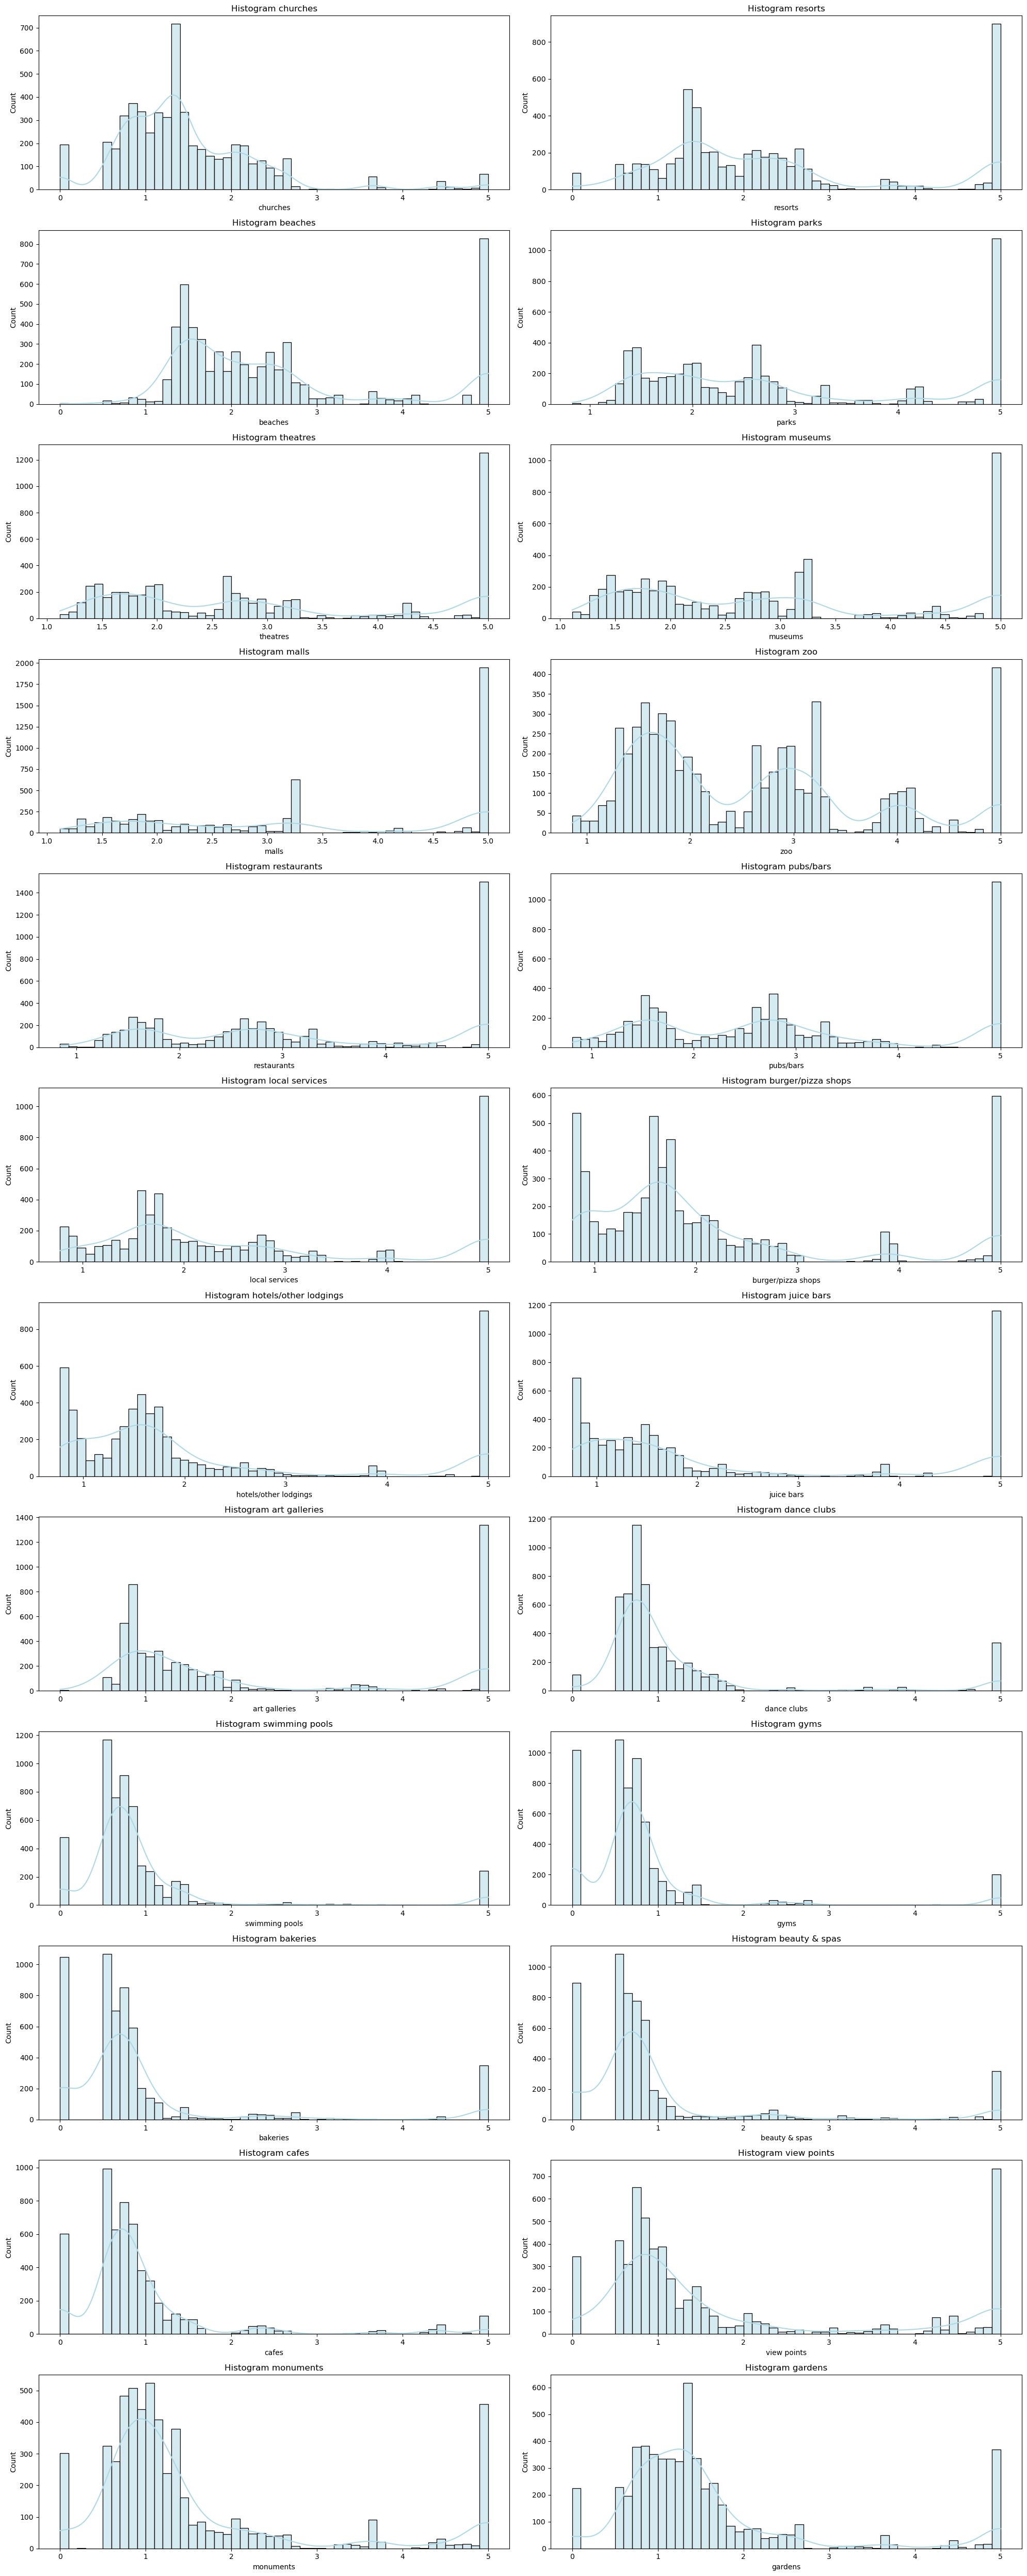

In [17]:
num_filas = 12
num_columnas = 2

fig, axs = plt.subplots(num_filas, num_columnas, figsize=(20, 50))

for i, variable in enumerate(df):
    fila = i // num_columnas
    columna = i % num_columnas
    sns.histplot(df[variable], bins=50, kde=True, color='lightblue', ax=axs[fila, columna])
    axs[fila, columna].set_title(f'Histogram {variable}')
    #axs[fila, columna].grid(True)

plt.tight_layout()
plt.show()

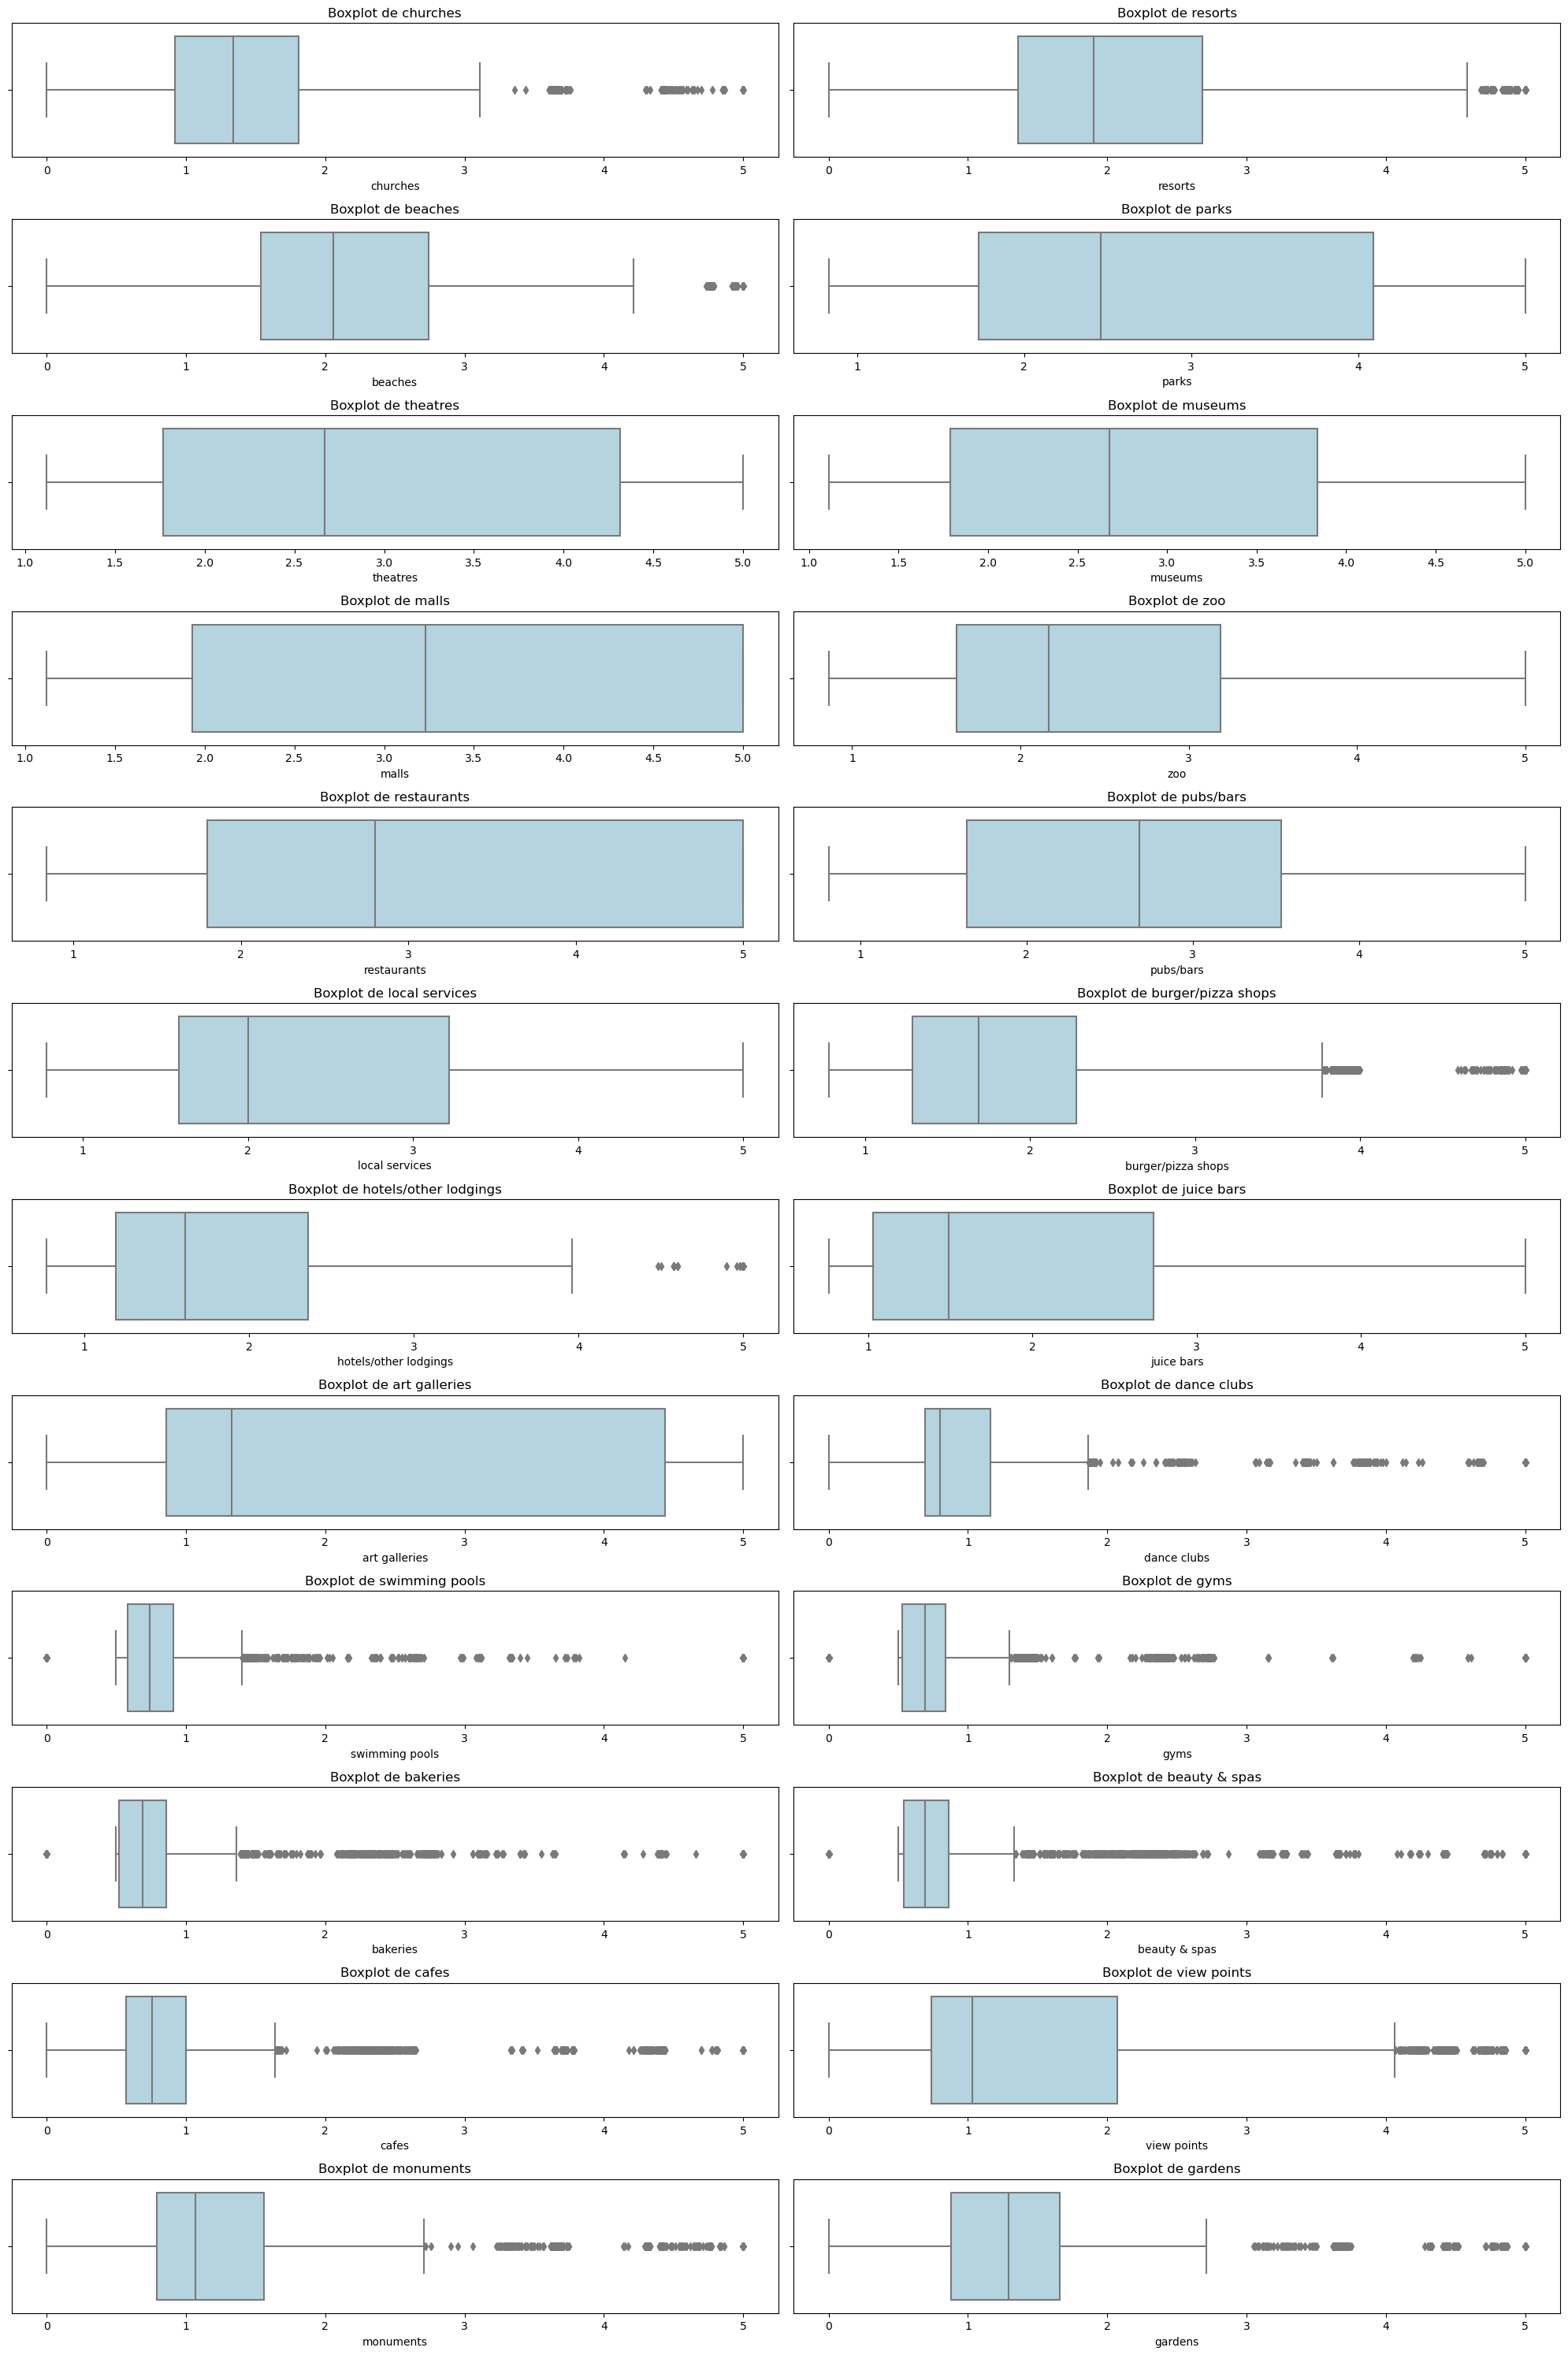

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(12, 2, figsize=(20, 30))

for i, variable in enumerate(df):
    fila = i // 2
    columna = i % 2
    
    sns.boxplot(x=df[variable], ax=axs[fila, columna], color='lightblue')
    axs[fila, columna].set_title(f'Boxplot de {variable}')

plt.tight_layout()
plt.show()


In [19]:
corrmat = df.corr()
corrmat

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
churches,1.000000,0.248991,0.148805,0.070692,0.035451,-0.093143,-0.264632,-0.181267,-0.290214,-0.274683,...,-0.134914,0.067285,0.130099,0.160360,0.180271,0.199397,0.309238,0.364375,0.407033,0.489280
resorts,0.248991,1.000000,0.325011,0.167338,0.153520,0.053916,-0.050158,-0.004500,-0.050550,-0.092526,...,-0.066670,-0.033119,-0.077146,-0.025446,0.032529,0.096974,0.088990,0.018366,0.077616,0.125231
beaches,0.148805,0.325011,1.000000,0.396786,0.329925,0.161242,-0.072713,-0.186308,-0.219842,-0.179090,...,-0.134203,-0.022249,-0.084643,-0.119810,-0.075402,-0.009202,0.001105,0.134571,0.117458,0.082472
parks,0.070692,0.167338,0.396786,1.000000,0.626868,0.315354,-0.067914,-0.128064,-0.169442,-0.115515,...,-0.272130,0.018274,-0.132468,-0.183849,-0.192665,-0.092453,-0.056226,0.276727,0.173550,0.090500
theatres,0.035451,0.153520,0.329925,0.626868,1.000000,0.489937,0.077807,-0.002595,-0.170430,-0.100191,...,-0.323902,-0.056347,-0.184345,-0.243357,-0.256987,-0.191997,-0.133433,0.124431,0.128055,0.098706
museums,-0.093143,0.053916,0.161242,0.315354,0.489937,1.000000,0.382774,0.200528,0.114719,-0.019007,...,-0.187512,-0.149295,-0.229604,-0.271354,-0.266608,-0.227362,-0.197454,-0.090481,-0.081109,-0.066540
malls,-0.264632,-0.050158,-0.072713,-0.067914,0.077807,0.382774,1.000000,0.406959,0.432054,0.256563,...,0.092527,-0.142861,-0.207275,-0.226475,-0.272979,-0.232408,-0.257728,-0.360287,-0.223080,-0.247628
zoo,-0.181267,-0.004500,-0.186308,-0.128064,-0.002595,0.200528,0.406959,1.000000,0.536870,0.551409,...,-0.064692,-0.124417,-0.202950,-0.236106,-0.281018,-0.254393,-0.274733,-0.255520,-0.167927,-0.137232
restaurants,-0.290214,-0.050550,-0.219842,-0.169442,-0.170430,0.114719,0.432054,0.536870,1.000000,0.564086,...,0.126720,-0.119844,-0.229585,-0.266700,-0.271881,-0.164033,-0.185958,-0.268053,-0.268314,-0.326461
pubs/bars,-0.274683,-0.092526,-0.179090,-0.115515,-0.100191,-0.019007,0.256563,0.551409,0.564086,1.000000,...,0.038084,-0.031927,-0.212346,-0.273837,-0.324115,-0.247502,-0.230389,-0.183660,-0.213030,-0.263569


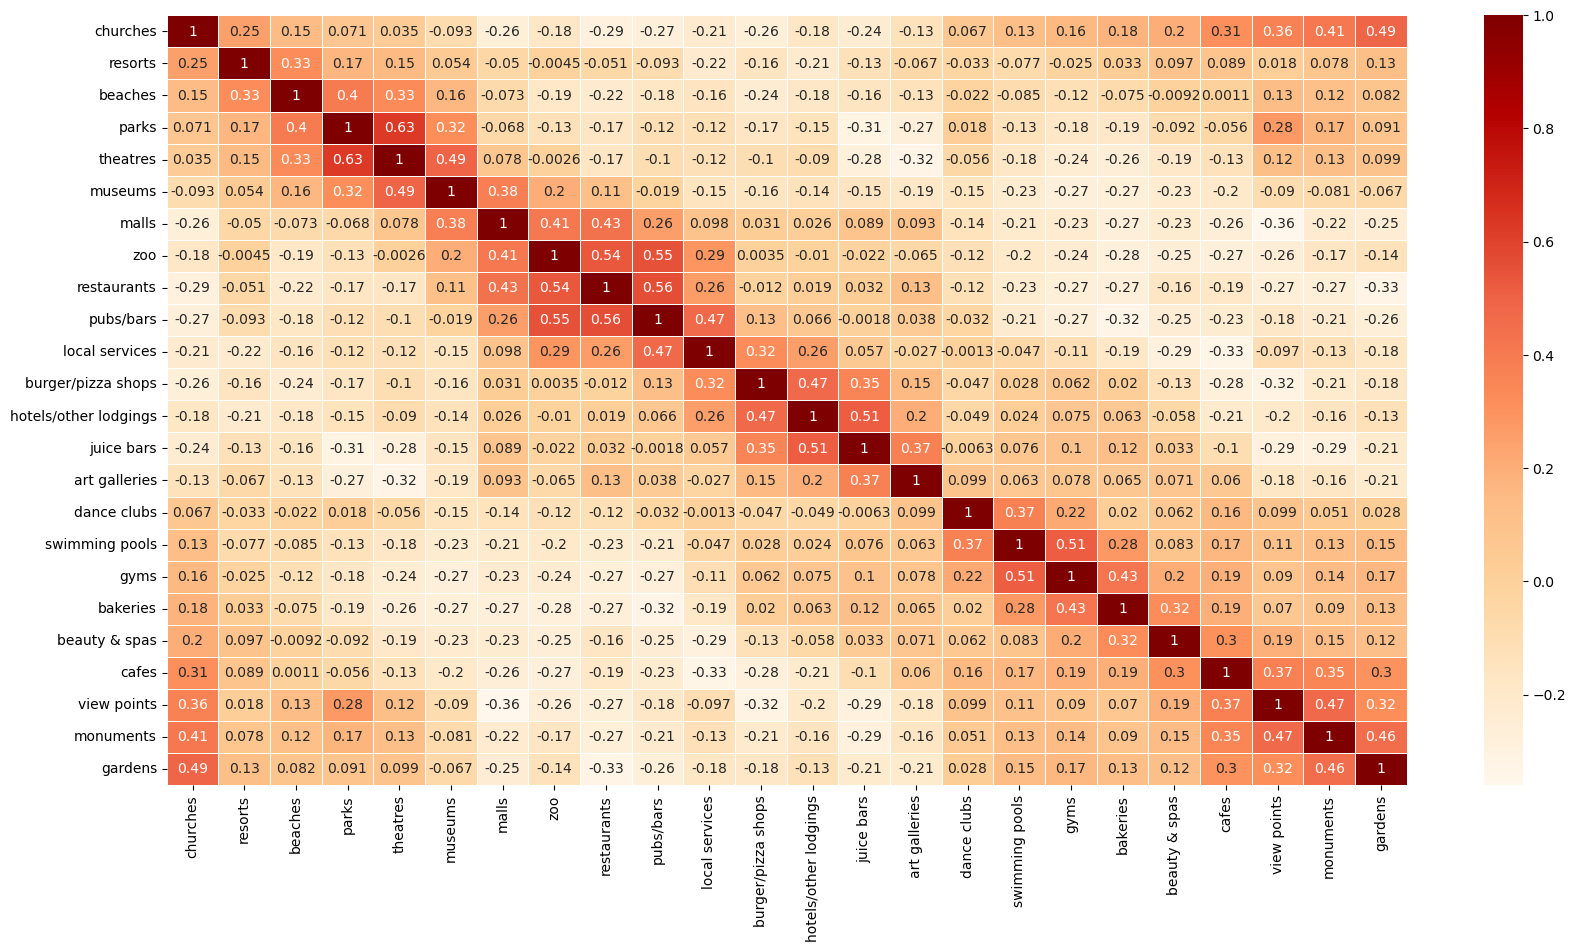

In [20]:
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(corrmat, annot = True,  cmap ='OrRd', linewidths=.5)
plt.show()

In [21]:
for variable in df:
    num_zeros = (df[variable] == 0).sum()
    print(f"Número de ceros en la variable '{variable}': {num_zeros}")

Número de ceros en la variable 'churches': 195
Número de ceros en la variable 'resorts': 90
Número de ceros en la variable 'beaches': 4
Número de ceros en la variable 'parks': 0
Número de ceros en la variable 'theatres': 0
Número de ceros en la variable 'museums': 0
Número de ceros en la variable 'malls': 0
Número de ceros en la variable 'zoo': 0
Número de ceros en la variable 'restaurants': 0
Número de ceros en la variable 'pubs/bars': 0
Número de ceros en la variable 'local services': 0
Número de ceros en la variable 'burger/pizza shops': 0
Número de ceros en la variable 'hotels/other lodgings': 0
Número de ceros en la variable 'juice bars': 0
Número de ceros en la variable 'art galleries': 4
Número de ceros en la variable 'dance clubs': 112
Número de ceros en la variable 'swimming pools': 479
Número de ceros en la variable 'gyms': 1017
Número de ceros en la variable 'bakeries': 1046
Número de ceros en la variable 'beauty & spas': 896
Número de ceros en la variable 'cafes': 604
Númer

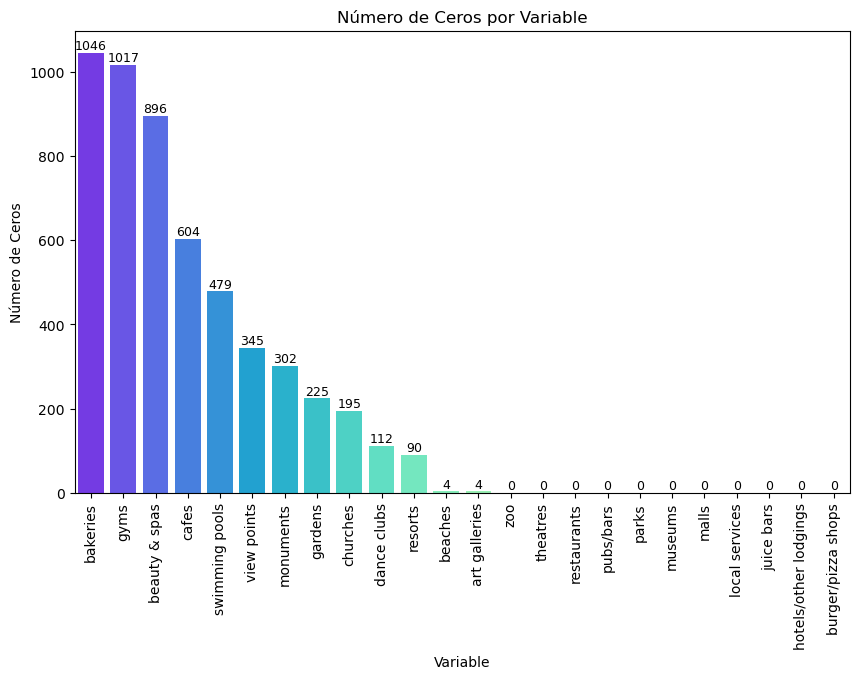

In [22]:
num_zeros_por_variable = []

for variable in df:
    num_zeros = (df[variable] == 0).sum()
    num_zeros_por_variable.append(num_zeros)

variables_numericas_ordenadas = [x for _, x in sorted(zip(num_zeros_por_variable, df), reverse=True)]

num_zeros_por_variable_ordenados = sorted(num_zeros_por_variable, reverse=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=variables_numericas_ordenadas, y=num_zeros_por_variable_ordenados, palette='rainbow')
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Número de Ceros')
plt.title('Número de Ceros por Variable')

for i, v in enumerate(num_zeros_por_variable_ordenados):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=9)

plt.show()

In [23]:
def imputar_outliers_por_valores_cercanos(df, rango=1):
    
    df2 = df.copy()
    
    for columna in df2.columns:
        
        media = df2[columna].mean()
        desviacion_estandar = df2[columna].std()
        
        limite_inferior = media - rango * desviacion_estandar
        limite_superior = media + rango * desviacion_estandar
        
        df2[columna] = df2[columna].apply(lambda x: df2[columna].abs().min() if x < limite_inferior else (df2[columna].abs().max() if x > limite_superior else x))
    
    return df2

df2 = df.copy()

df2 = imputar_outliers_por_valores_cercanos(df2, rango=1)

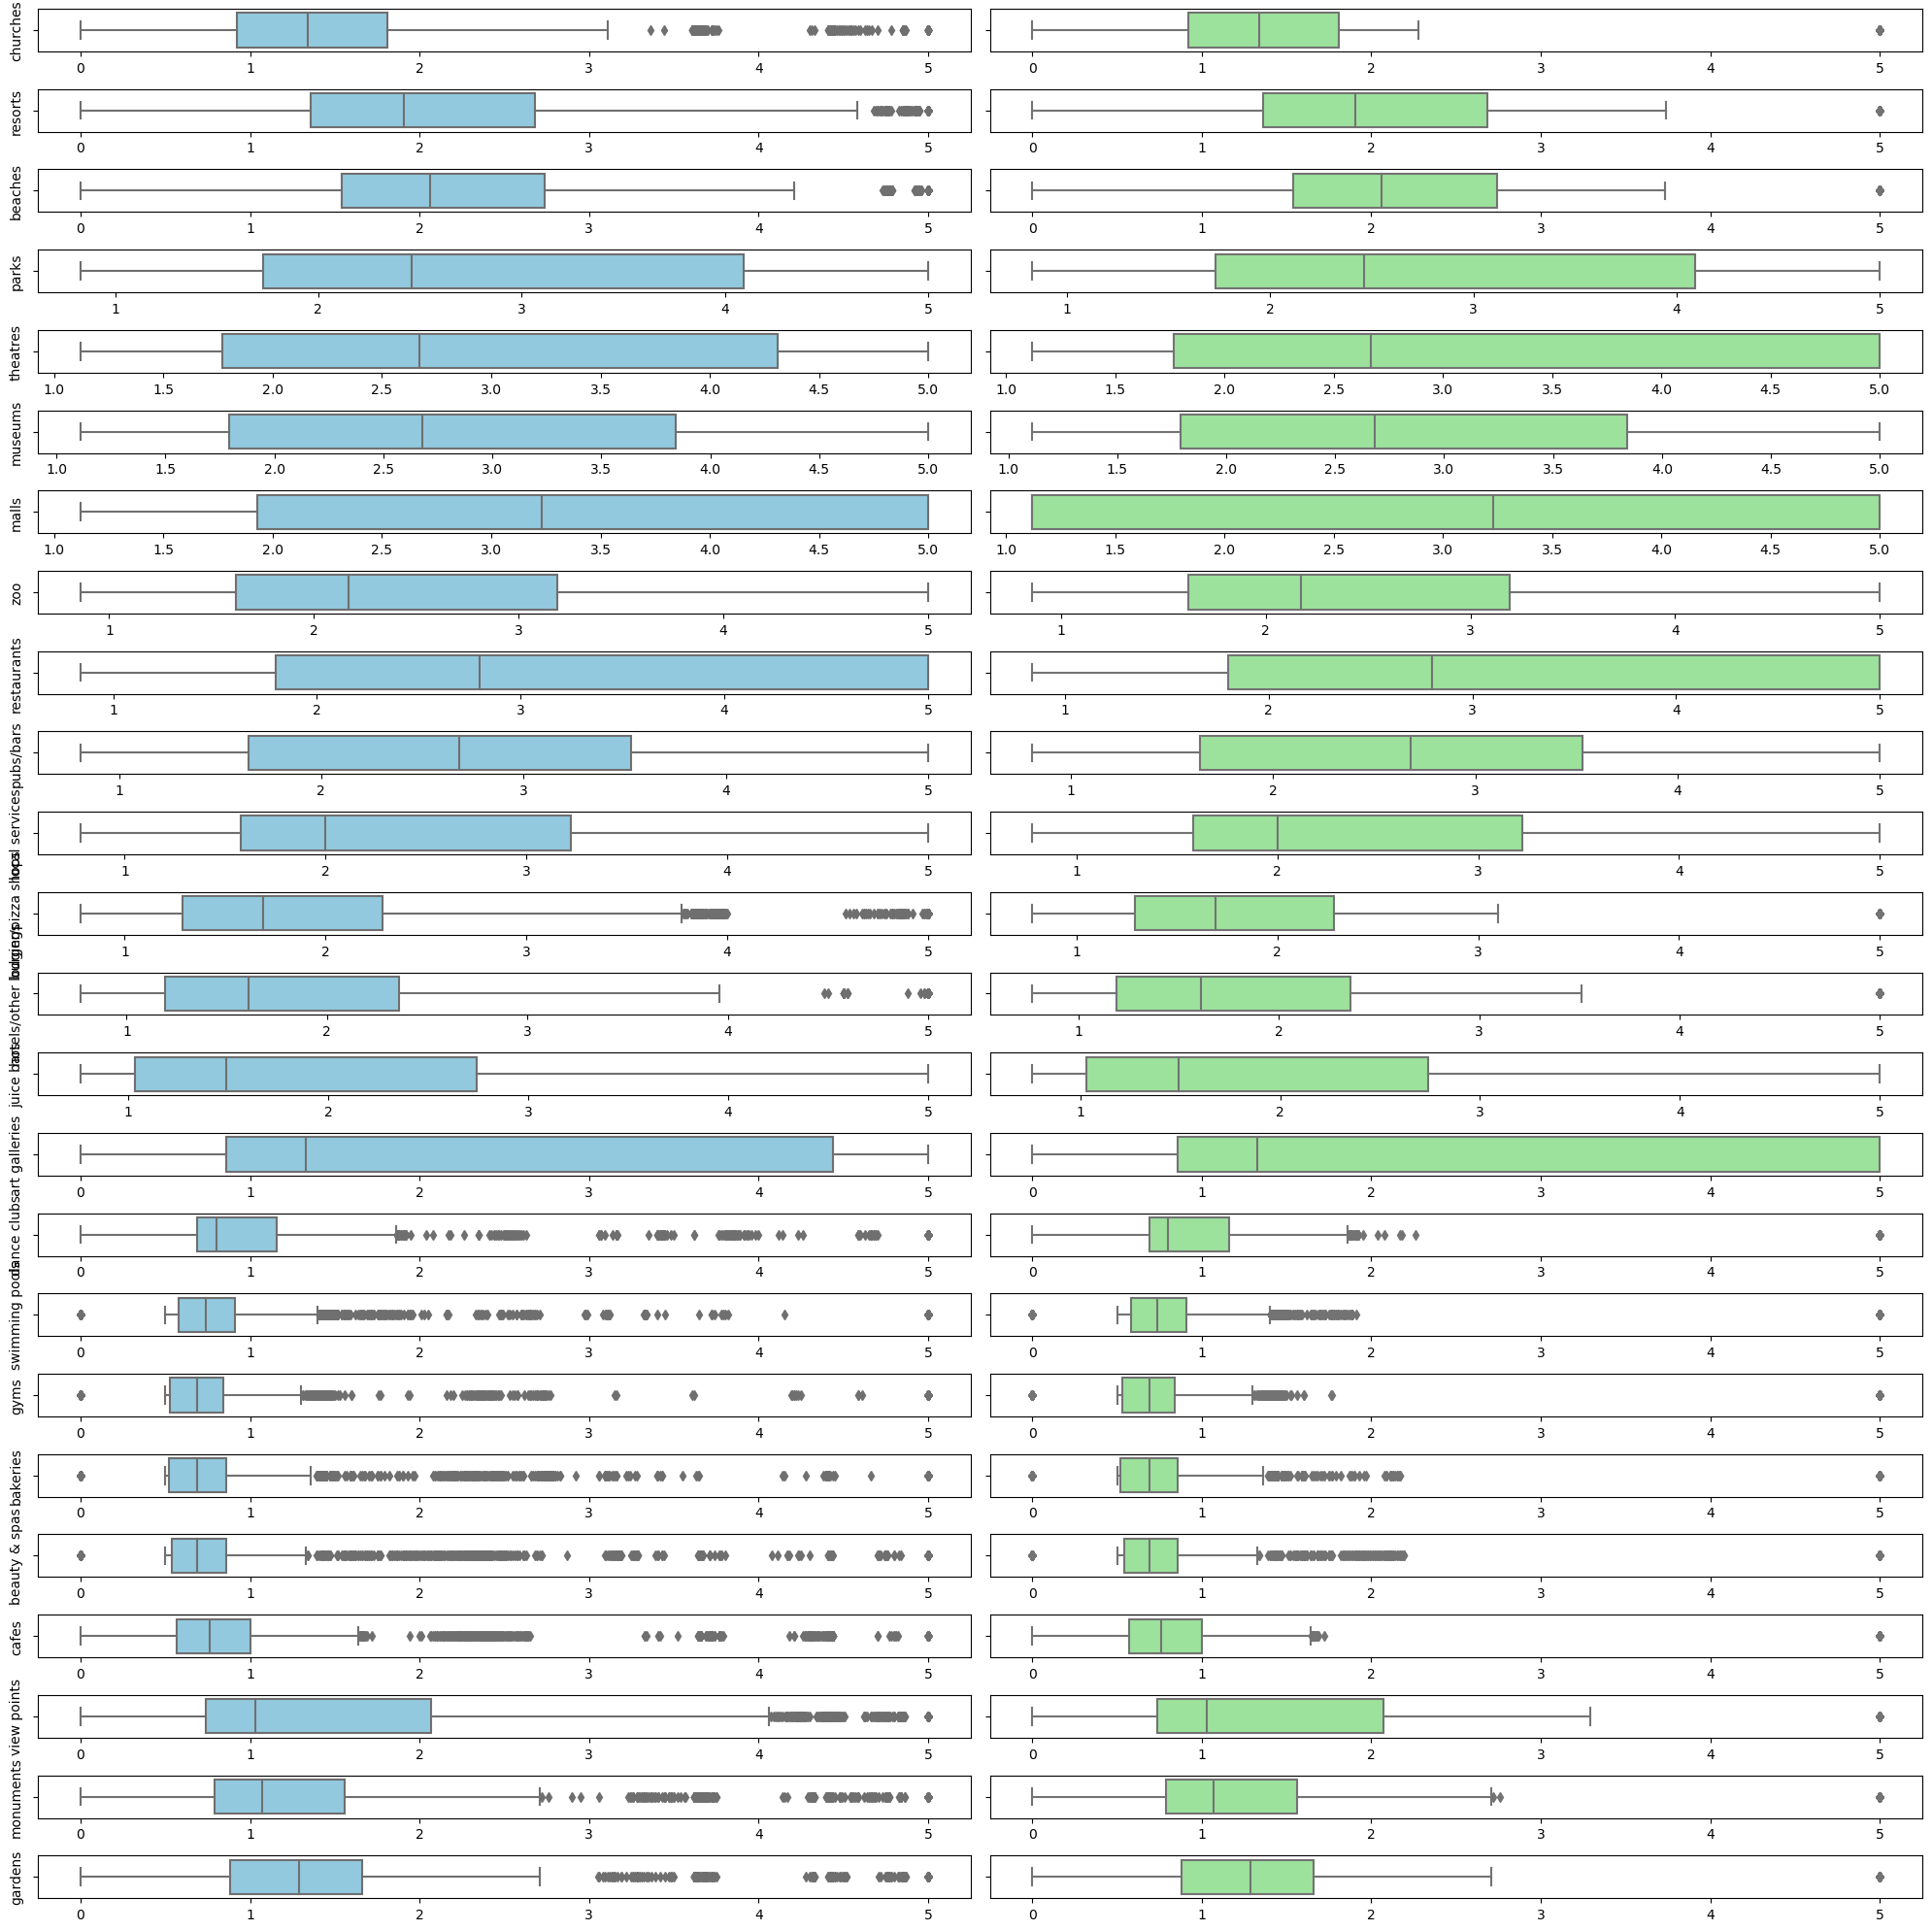

In [24]:
fig, axes = plt.subplots(24, 2, figsize=(20, 20))

for i, variable in enumerate(df):
    sns.boxplot(data=df, x=variable, ax=axes[i, 0], color='skyblue')
    sns.boxplot(data=df2, x=variable, ax=axes[i, 1], color='lightgreen')

    if i < len(df) - 1:
        axes[i, 0].set_xlabel('')
        axes[i, 1].set_xlabel('')
    else:
        axes[i, 0].set_xlabel('Boxplot antes de winsorizar')
        axes[i, 1].set_xlabel('Boxplot después de winsorizar')

    axes[i, 0].set_ylabel(variable)
    axes[i, 1].set_ylabel('')

plt.tight_layout()
plt.show()

## <font color='157699'> Escalado de variables </font>

In [25]:
scaler = StandardScaler()
df2[df2.columns] = scaler.fit_transform(df2[df2.columns])
df2.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,-1.243109,-1.480619,0.86019,0.619735,1.468397,0.042017,1.126299,-0.175791,-0.418544,-0.089770,...,-0.273508,-0.533204,-0.45191,-0.794306,-0.401231,-0.781648,-0.873325,-1.069184,-1.114306,-1.276926
1,-1.243109,-1.480619,0.86019,0.619735,1.468397,0.042017,1.126299,0.043707,-0.418544,-0.082633,...,-0.273508,-0.533204,-0.45191,-0.794306,-0.401231,-0.781648,-0.873325,-1.069184,-1.114306,-1.276926
2,-1.243109,-1.480619,0.86019,0.606055,1.468397,0.042017,1.126299,0.043707,-0.418544,-0.089770,...,-0.273508,-0.533204,-0.45191,-0.794306,-0.401231,-0.781648,-0.873325,-1.069184,-1.114306,-1.276926
3,-1.243109,-1.480619,0.86019,0.606055,1.468397,0.042017,1.126299,-0.175791,-0.418544,-0.089770,...,-0.273508,-0.533204,-0.45191,-0.794306,-0.401231,-0.781648,-0.873325,-1.069184,-1.114306,-1.276926
4,-1.243109,-1.480619,0.86019,0.606055,1.468397,0.042017,1.126299,0.043707,-0.418544,-0.089770,...,-0.273508,-0.533204,-0.45191,-0.794306,-0.401231,-0.781648,-0.873325,-1.069184,-1.114306,-1.276926


## <font color='157699'> Reducción de Dimensionalidad </font>

In [26]:
pca = PCA(n_components=0.55).fit(df2)

#Veamos cuántas componentes ha conservado PCA:
pca.n_components_

5

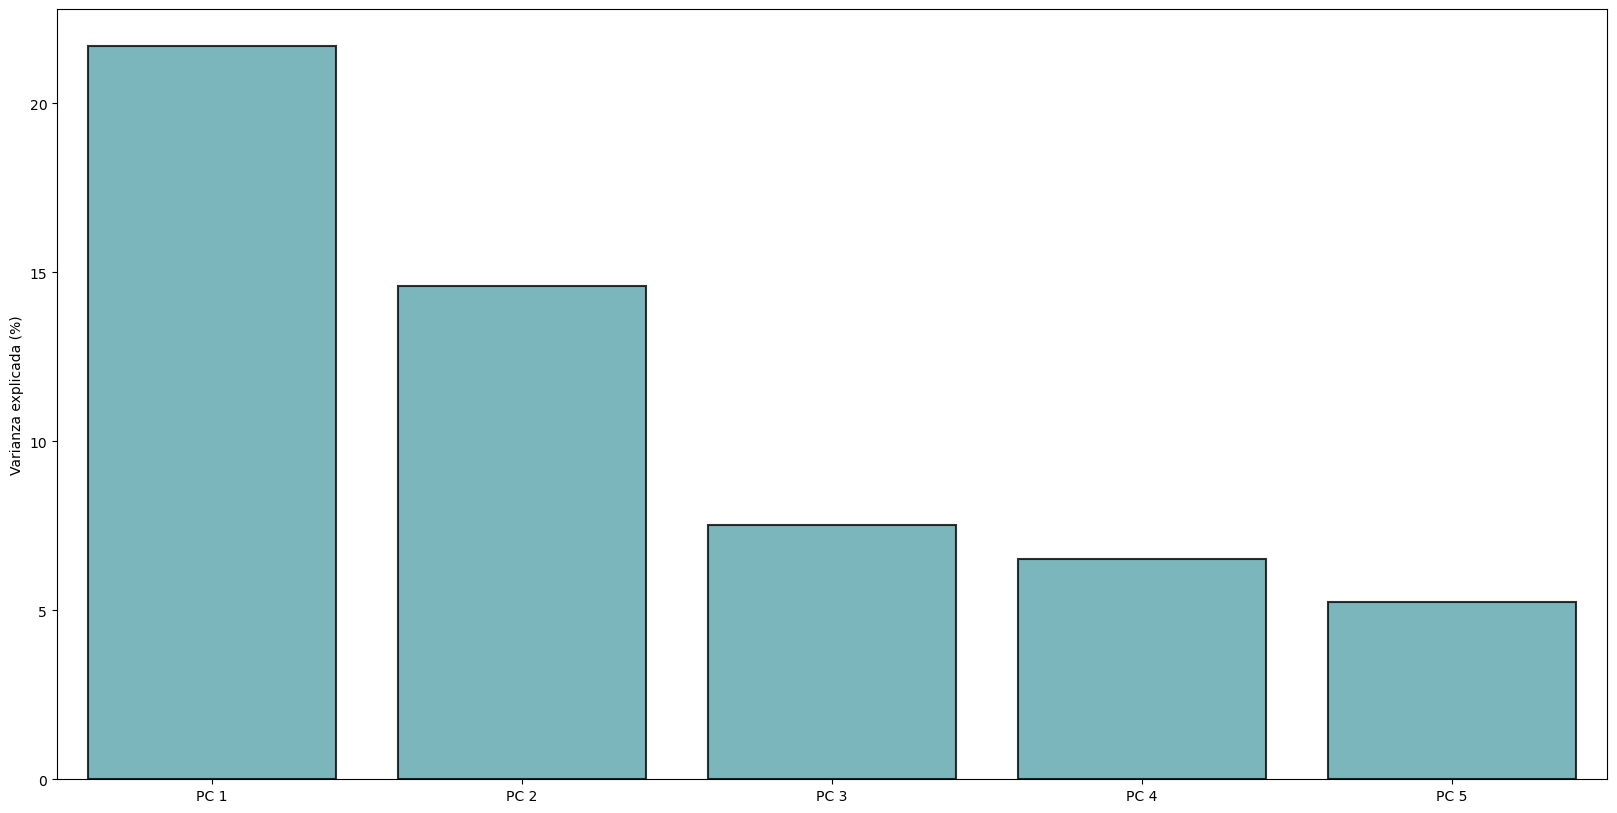

In [27]:
# --- Varianza explicada ---
PCA_variance = pd.DataFrame({'Varianza explicada (%)':
                             pca.explained_variance_ratio_*100})

fig, ax = plt.subplots(1, 1, figsize = (20, 10))

bar = sns.barplot(x = ['PC ' + str(i) for i in range(1, 6)],
                  y = PCA_variance['Varianza explicada (%)'],
                  linewidth = 1.5, edgecolor = 'k', color = '#4bafb8',
                  alpha = 0.8)

plt.show()

In [28]:
PCA_variance

,Varianza explicada (%)
0,21.699740
1,14.607052
2,7.528084
3,6.520131
4,5.240604


In [29]:
#Por último, transforme "df2" de 24 columnas X_pca
X_pca = pca.fit_transform(df2)
X_pca

array([[-1.91607276, -1.54576254,  1.6541392 , -0.66577532,  0.58716039],
       [-1.97790708, -1.56091059,  1.57713011, -0.66722109,  0.5974347 ],
       [-1.9769594 , -1.55585356,  1.57633114, -0.67045682,  0.59473489],
       ...,
       [ 3.77019335, -1.51385618,  0.41678144, -0.91738007, -1.12235307],
       [ 3.63345513, -0.90471578,  0.52294934, -1.54487474, -1.16085005],
       [ 3.59843584, -1.61965633,  0.30822511, -1.12705909, -1.08751126]])

In [30]:
X_pca.shape

(5456, 5)

## <font color='157699'> Clustering Algorithm: K-Means </font>

In [31]:
# Número optimo de K
inertia_list = []

for i in range(1, 5):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init = 100, max_iter = 100, random_state=3)
    kmeans.fit(df2)
    inertia_list.append(kmeans.inertia_)

In [32]:
# métricas para saber qué tan cohesionados están los clusters

print('el valor del SSE más bajo: \n', kmeans.inertia_) # 

print('\n coordenadas de los centroides: \n', kmeans.cluster_centers_)

print('\n número de iteraciones necesarias para converger: \n', kmeans.n_iter_)

el valor del SSE más bajo: 
 90715.53950910935

 coordenadas de los centroides: 
 [[ 1.3835827   0.23668332 -0.06467284 -0.45134178 -0.66032645 -0.80790709
  -0.95357869 -0.94422916 -1.09588886 -0.98617854 -0.69159192 -0.50905263
  -0.42076614 -0.21172612  0.05410286  0.44554485  0.91775252  1.31900077
   1.36785815  1.10920859  1.32908145  0.73354924  0.8989361   1.08837423]
 [-0.69034419 -0.87500778 -0.61716828 -0.85162432 -0.91955427 -0.88580337
  -0.24348796 -0.43529983 -0.05663028  0.07105416  0.41930529  1.33905962
   1.43977983  1.49887336  0.99435065  0.210019    0.32429044  0.05301808
   0.09529244 -0.0963677  -0.30809277 -0.61831514 -0.62410628 -0.60749701]
 [-0.01429116  0.25967653  0.60635683  0.87634409  0.90311678  0.51729949
  -0.08195548 -0.28081581 -0.33929684 -0.27064416 -0.22645729 -0.1437655
  -0.18157292 -0.43941081 -0.43627212 -0.04673621 -0.21406634 -0.2774679
  -0.27051648 -0.16186338 -0.17123414  0.27407778  0.19684215  0.05518293]
 [-0.37198612 -0.07374006 -0.

In [33]:
kmeans.labels_

array([2, 2, 2, ..., 2, 0, 2])

In [34]:
label = kmeans.fit_predict(df2)
print(label[:999])

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 3 3 3 2 3 3 3 3 3 3 3 3 3
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 3 3 2 3 3 3 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 2 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 2 3 3 3 3 2 2 2 3 3 3 3 3 1 3 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2
 2 2 2 1 2 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 1 1 3 3 3 3 1 1 1 3 3 3 3 3 3 2 2 2 2 2 3 3 3 3 3 3 3 2 2 2 3 3
 3 3 3 2 3 3 3 3 3 3 2 3 3 3 2 2 2 3 2 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

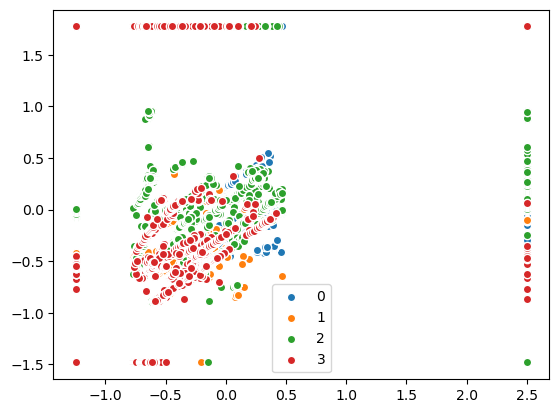

In [35]:
# Obtener valores únicos de cluster
u_labels = np.unique(label)

# Diagramar el resultado
for i in u_labels:
    plt.scatter(df2.loc[label == i, df2.columns[0]],
                df2.loc[label == i, df2.columns[1]],
                label=i, edgecolor='white')
plt.legend()
plt.show()


se varió en múltiples ocasiones el número de k para determianr cuál era en óptimo, sin embargo es como un valor de k = 4 que no se presentan mayores dificultades a la hora de generar el gráfico.

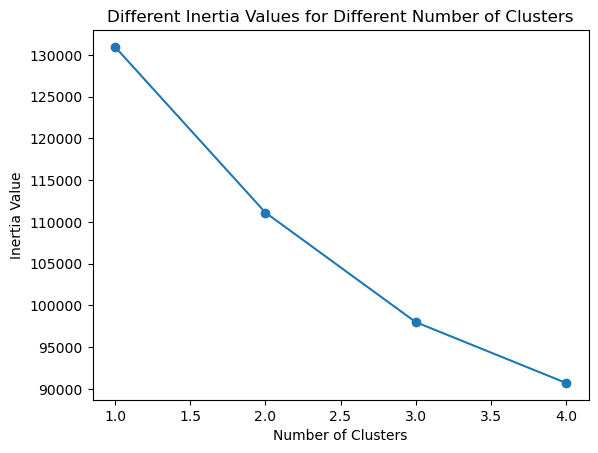

In [36]:
# plot the inertia curve
plt.plot(range(1,5),inertia_list)
plt.scatter(range(1,5),inertia_list)
plt.xlabel("Number of Clusters", size=10)
plt.ylabel("Inertia Value", size=10)
plt.title("Different Inertia Values for Different Number of Clusters", size=12)
plt.show()

In [37]:
# Seleccion automatica del numero k
kl = KneeLocator(range(1, 5),
                 inertia_list, curve="convex",
                 direction="decreasing")
kl.elbow

In [38]:
kmeans_constants = {"init": "k-means++", "n_init": 1000,
                    "max_iter": 5000, "random_state": 42}

# --- Modelo K-means ---
model_kmeans = KMeans(n_clusters = 4, **kmeans_constants)
model_kmeans.fit(df2)

KMeans(max_iter=5000, n_clusters=4, n_init=1000, random_state=42)

In [39]:
# --- Evaluación del modelo kmeans ---
print(" ### K-MEANS ###")
print('Inertia: ', model_kmeans.inertia_)
print('Silhouette Score: ', silhouette_score(df2, model_kmeans.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(df2, model_kmeans.labels_))

 ### K-MEANS ###
Inertia:  90715.53950910935
Silhouette Score:  0.14182661012500977
Calinski harabasz score:  805.9095783852654


In [40]:
# Predicción de los clusters
Cluster_1 = model_kmeans.fit_predict(df2)
Cluster_1

array([0, 0, 0, ..., 0, 2, 0])

In [41]:
# Vamos a adjuntar 'Cluster_1' como una nueva variable a 'train_df1_out':
df_final = df2.copy()
df_final['Cluster_1']= Cluster_1

# A partir de ahora, sólo trabajaremos con "df_final"
df_final.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens,Cluster_1
0,-1.243109,-1.480619,0.86019,0.619735,1.468397,0.042017,1.126299,-0.175791,-0.418544,-0.089770,...,-0.533204,-0.45191,-0.794306,-0.401231,-0.781648,-0.873325,-1.069184,-1.114306,-1.276926,0
1,-1.243109,-1.480619,0.86019,0.619735,1.468397,0.042017,1.126299,0.043707,-0.418544,-0.082633,...,-0.533204,-0.45191,-0.794306,-0.401231,-0.781648,-0.873325,-1.069184,-1.114306,-1.276926,0
2,-1.243109,-1.480619,0.86019,0.606055,1.468397,0.042017,1.126299,0.043707,-0.418544,-0.089770,...,-0.533204,-0.45191,-0.794306,-0.401231,-0.781648,-0.873325,-1.069184,-1.114306,-1.276926,0
3,-1.243109,-1.480619,0.86019,0.606055,1.468397,0.042017,1.126299,-0.175791,-0.418544,-0.089770,...,-0.533204,-0.45191,-0.794306,-0.401231,-0.781648,-0.873325,-1.069184,-1.114306,-1.276926,0
4,-1.243109,-1.480619,0.86019,0.606055,1.468397,0.042017,1.126299,0.043707,-0.418544,-0.089770,...,-0.533204,-0.45191,-0.794306,-0.401231,-0.781648,-0.873325,-1.069184,-1.114306,-1.276926,0


In [42]:
df_final.Cluster_1.value_counts()

0    2069
3    1835
2     860
1     692
Name: Cluster_1, dtype: int64

## <font color='157699'> K-Means con PCA 3 Componentes </font>

In [43]:
# Número optimo de K
inertia_list = []

for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans.fit(X_pca)
    inertia_list.append(kmeans.inertia_)

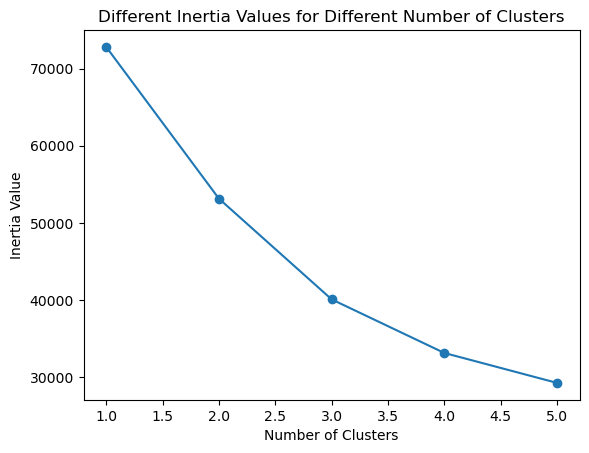

In [44]:
# plot the inertia curve
plt.plot(range(1,6),inertia_list)
plt.scatter(range(1,6),inertia_list)
plt.xlabel("Number of Clusters", size=10)
plt.ylabel("Inertia Value", size=10)
plt.title("Different Inertia Values for Different Number of Clusters", size=12)
plt.show()

In [45]:
# Seleccion automatica del numero k
kl = KneeLocator(range(1, 6),
                 inertia_list, curve="convex",
                 direction="decreasing")

kl.elbow

3

In [46]:
kmeans_constants = {"init": "k-means++", "n_init": 1000, "max_iter": 5000, "random_state": 42}

# --- Modelo K-means ---
model_kmeans_pca = KMeans(n_clusters = 3, **kmeans_constants)
model_kmeans_pca.fit(X_pca)

KMeans(max_iter=5000, n_clusters=3, n_init=1000, random_state=42)

In [47]:
# --- Evaluación del modelo kmeans ---
print(" ### K-MEANS ###")
print('Inertia: ', model_kmeans_pca.inertia_)
print('Silhouette Score: ', silhouette_score(X_pca, model_kmeans_pca.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(X_pca, model_kmeans_pca.labels_))

 ### K-MEANS ###
Inertia:  40114.50730476518
Silhouette Score:  0.27245161959515163
Calinski harabasz score:  2221.5073270241005


In [48]:
# Predicción de los clusters
Cluster_2 = model_kmeans.fit_predict(X_pca)

df_final['Cluster_2']= Cluster_2

# A partir de ahora, sólo trabajaremos con "df_final"
df_final.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens,Cluster_1,Cluster_2
0,-1.243109,-1.480619,0.86019,0.619735,1.468397,0.042017,1.126299,-0.175791,-0.418544,-0.089770,...,-0.45191,-0.794306,-0.401231,-0.781648,-0.873325,-1.069184,-1.114306,-1.276926,0,1
1,-1.243109,-1.480619,0.86019,0.619735,1.468397,0.042017,1.126299,0.043707,-0.418544,-0.082633,...,-0.45191,-0.794306,-0.401231,-0.781648,-0.873325,-1.069184,-1.114306,-1.276926,0,1
2,-1.243109,-1.480619,0.86019,0.606055,1.468397,0.042017,1.126299,0.043707,-0.418544,-0.089770,...,-0.45191,-0.794306,-0.401231,-0.781648,-0.873325,-1.069184,-1.114306,-1.276926,0,1
3,-1.243109,-1.480619,0.86019,0.606055,1.468397,0.042017,1.126299,-0.175791,-0.418544,-0.089770,...,-0.45191,-0.794306,-0.401231,-0.781648,-0.873325,-1.069184,-1.114306,-1.276926,0,1
4,-1.243109,-1.480619,0.86019,0.606055,1.468397,0.042017,1.126299,0.043707,-0.418544,-0.089770,...,-0.45191,-0.794306,-0.401231,-0.781648,-0.873325,-1.069184,-1.114306,-1.276926,0,1


In [49]:
df_final['Cluster_2'].value_counts()

1    2115
3    1831
0     766
2     744
Name: Cluster_2, dtype: int64

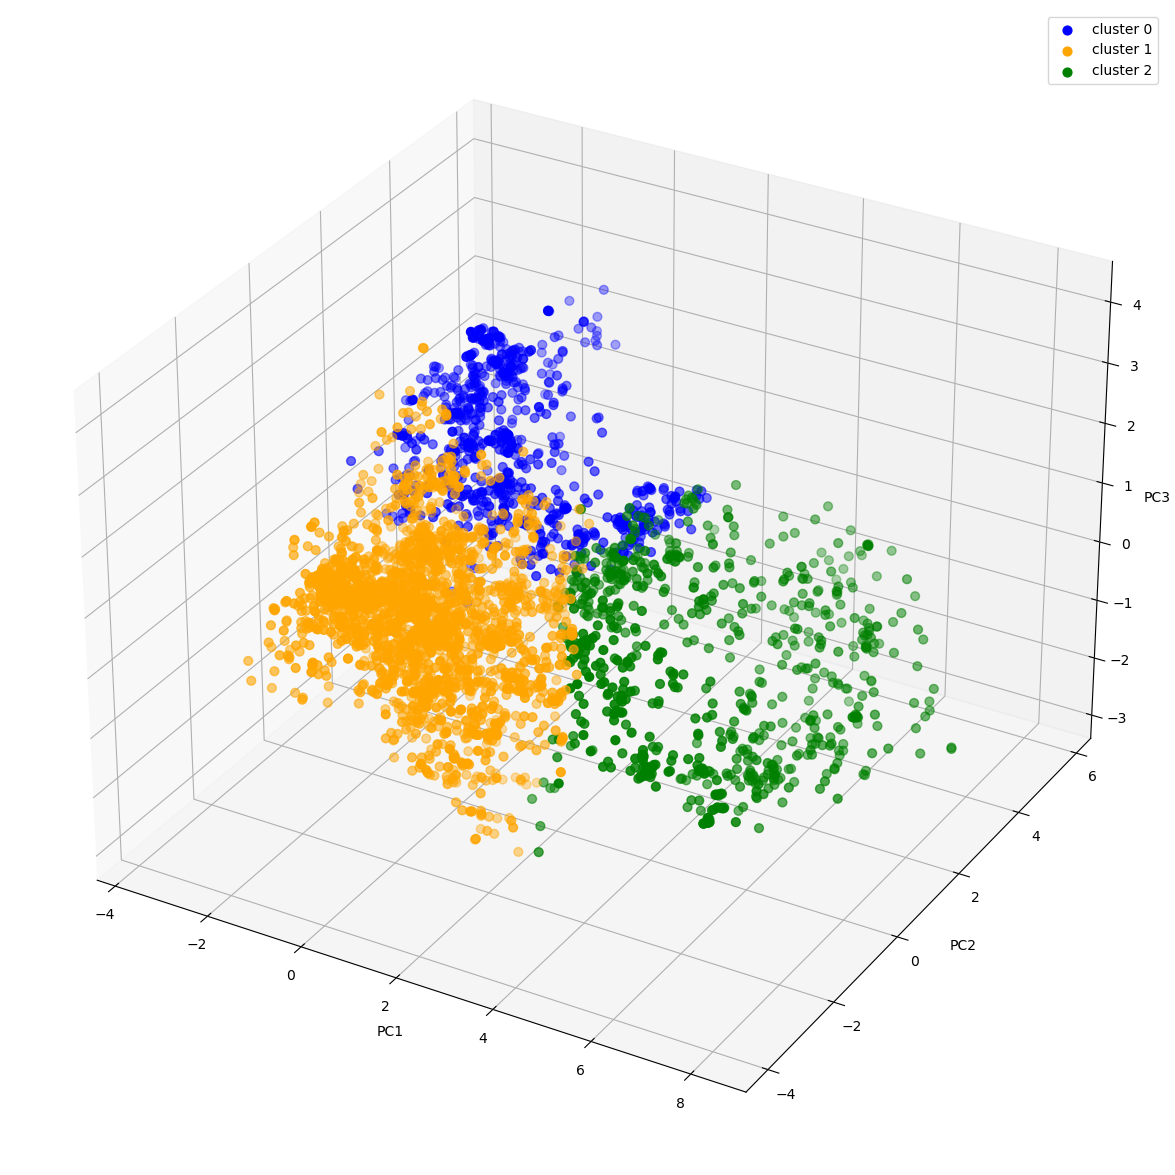

In [50]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[Cluster_2 == 0,0],X_pca[Cluster_2 == 0,1],X_pca[Cluster_2 == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X_pca[Cluster_2 == 1,0],X_pca[Cluster_2 == 1,1],X_pca[Cluster_2 == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(X_pca[Cluster_2 == 2,0],X_pca[Cluster_2 == 2,1],X_pca[Cluster_2 == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

In [51]:
df_final.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens,Cluster_1,Cluster_2
0,-1.243109,-1.480619,0.86019,0.619735,1.468397,0.042017,1.126299,-0.175791,-0.418544,-0.089770,...,-0.45191,-0.794306,-0.401231,-0.781648,-0.873325,-1.069184,-1.114306,-1.276926,0,1
1,-1.243109,-1.480619,0.86019,0.619735,1.468397,0.042017,1.126299,0.043707,-0.418544,-0.082633,...,-0.45191,-0.794306,-0.401231,-0.781648,-0.873325,-1.069184,-1.114306,-1.276926,0,1
2,-1.243109,-1.480619,0.86019,0.606055,1.468397,0.042017,1.126299,0.043707,-0.418544,-0.089770,...,-0.45191,-0.794306,-0.401231,-0.781648,-0.873325,-1.069184,-1.114306,-1.276926,0,1
3,-1.243109,-1.480619,0.86019,0.606055,1.468397,0.042017,1.126299,-0.175791,-0.418544,-0.089770,...,-0.45191,-0.794306,-0.401231,-0.781648,-0.873325,-1.069184,-1.114306,-1.276926,0,1
4,-1.243109,-1.480619,0.86019,0.606055,1.468397,0.042017,1.126299,0.043707,-0.418544,-0.089770,...,-0.45191,-0.794306,-0.401231,-0.781648,-0.873325,-1.069184,-1.114306,-1.276926,0,1


In [52]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_pca)
df_final[['PCA1', 'PCA2', 'PCA3']] = principal_components

df_final['Cluster_2'] = df_final['Cluster_2'].astype('category')

fig = px.scatter_3d(df_final, x="PCA1", y="PCA2", z="PCA3", color="Cluster_1")
fig.update_traces(marker=dict(line=dict(color='white', width=2)))
fig.update_layout(width=1000, height=700)
fig.show()

c:\Users\cr-19\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



---

In [53]:
scaled_features = X_pca.copy()

min_clusters = 2
max_clusters = 5

inertia_values = []
silhouette_scores = []

for i in range(min_clusters, max_clusters+1):

    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans.fit(scaled_features)
    
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))



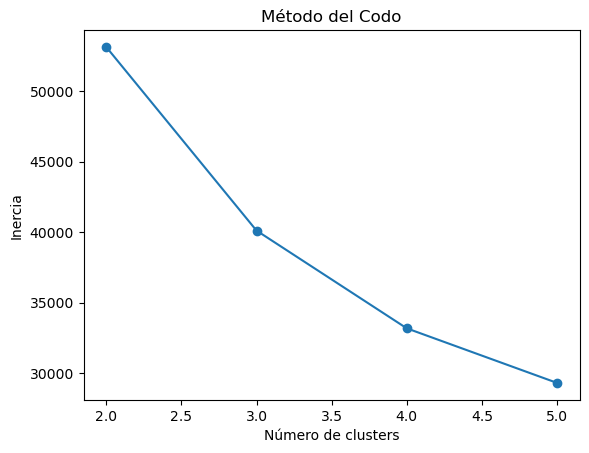

In [54]:
plt.plot(range(min_clusters, max_clusters+1), inertia_values, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

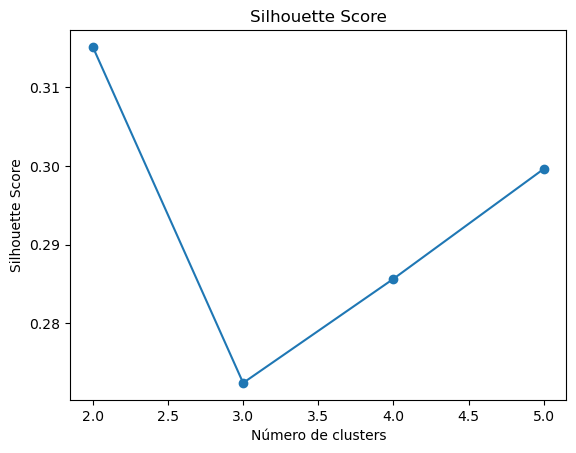

In [55]:
plt.plot(range(min_clusters, max_clusters+1), silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [56]:
optimal_n_clusters = 3

kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=3, random_state=42)

In [64]:
df['Cluster'] = kmeans.labels_

centroids = df.groupby('Cluster').mean().values

centroids_df = pd.DataFrame(centroids, columns=scaled_features.columns)
print("Centroides de los Clusters:")
print(centroids_df)

cluster_counts = df['Cluster'].value_counts().sort_index()
print("\nNúmero de muestras en cada cluster:")
print(cluster_counts)


ValueError: Index data must be 1-dimensional

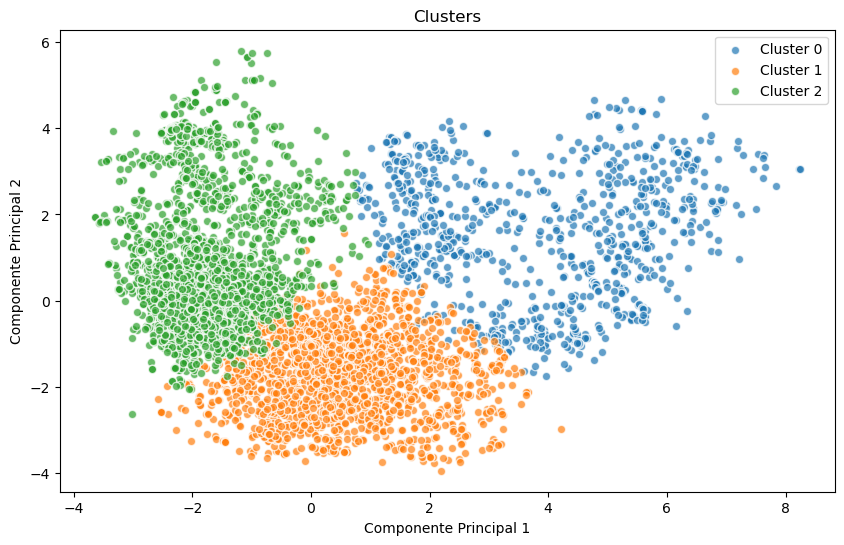

In [62]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 2 componentes usando PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Crear un DataFrame para los componentes principales y las etiquetas de cluster
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = df['Cluster']

# Visualizar los clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_n_clusters):
    cluster_data = principal_df[principal_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.7, edgecolor='white')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters')
plt.legend()
plt.show()
